In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import matplotlib.patches as mpatches

%matplotlib inline

headway = pd.read_csv('../data/Headway Data.csv')

In [2]:
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [6]:
trip_edge_df= headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']]
trip_edge_df

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
0,2021-11-01,7,297750,TO DOWNTOWN,1,1.983333,-2.000000,12.650000
1,2021-11-01,7,297750,TO DOWNTOWN,0,3.333333,-3.350000,0.000000
2,2021-11-01,7,297750,TO DOWNTOWN,2,NaN,-20.183333,22.416666
3,2021-11-01,50,297749,TO DOWNTOWN,1,NaN,-0.283333,5.766666
4,2021-11-01,50,297749,TO DOWNTOWN,2,NaN,10.016666,0.000000
...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,329980,TO DOWNTOWN,2,NaN,-2.733333,1.016666
1981711,2022-11-01,50,330003,TO DOWNTOWN,1,-2.366667,12.900000,9.900000
1981712,2022-11-01,50,330003,TO DOWNTOWN,2,NaN,26.733333,0.000000
1981713,2022-11-01,56,330011,TO DOWNTOWN,1,NaN,0.966666,19.366666


In [7]:
te_df1= trip_edge_df.groupby(['ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean().round()
te_df1

C:\Users\sarah\AppData\Local\Temp\ipykernel_17784\2832202184.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  te_df1= trip_edge_df.groupby(['ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean().round()


,ROUTE_ABBR,ADHERENCE,DWELL_IN_MINS
0,3,-2.0,2.0
1,7,-2.0,4.0
2,22,-1.0,3.0
3,23,-1.0,3.0
4,50,-2.0,3.0
5,52,-2.0,3.0
6,55,-3.0,2.0
7,56,-2.0,3.0


''

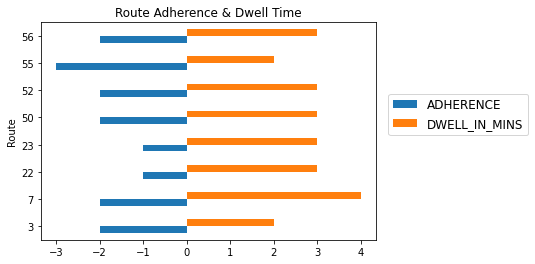

In [22]:
te_df1.plot(kind='barh', x='ROUTE_ABBR', title='Route Adherence & Dwell Time')
plt.ylabel('Route')
plt.legend(
         fontsize = 12,
         bbox_to_anchor = (1.02, 0.7))
;